# Customer Churn Predictive Model

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [22]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Feature Engineering

In [26]:
df=df.copy()
#Binary feature for balance

df['BalanceZero'] = (df['Balance'] == 0).astype(int)


#Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25,35,45,55,65,75,85,95], labels =['18-25', '26-35', '36-45', '46-55', '56-65', '66-75','76-85','86-95'])

#Balance to salary ratio
df['BalanceToSalaryRatio'] = df['Balance']/df['EstimatedSalary']

#Interaction feature between number of products and is acrive memeber
df['ProductUsage'] = df['NumOfProducts']*df['IsActiveMember']

#tenure Grouping
df['TenureGroup']= pd.cut(df['Tenure'], bins=[0,2,5,7,10], labels=['0-2', '3-5', '6-7', '8-10'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   RowNumber             10000 non-null  int64   
 1   CustomerId            10000 non-null  int64   
 2   Surname               10000 non-null  object  
 3   CreditScore           10000 non-null  int64   
 4   Geography             10000 non-null  object  
 5   Gender                10000 non-null  object  
 6   Age                   10000 non-null  int64   
 7   Tenure                10000 non-null  int64   
 8   Balance               10000 non-null  float64 
 9   NumOfProducts         10000 non-null  int64   
 10  HasCrCard             10000 non-null  int64   
 11  IsActiveMember        10000 non-null  int64   
 12  EstimatedSalary       10000 non-null  float64 
 13  Exited                10000 non-null  int64   
 14  BalanceZero           10000 non-null  int64   
 15  Age

### Label Encoding

In [28]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

#one Hot encoding
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df['Male_Germany'] = df['Gender']*df['Geography_Germany']
df['Male_Spain'] = df['Gender']*df['Geography_Spain']


In [29]:
df = pd.get_dummies(df, columns=['AgeGroup','TenureGroup'], drop_first=True)

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,AgeGroup_26-35,AgeGroup_36-45,AgeGroup_46-55,AgeGroup_56-65,AgeGroup_66-75,AgeGroup_76-85,AgeGroup_86-95,TenureGroup_3-5,TenureGroup_6-7,TenureGroup_8-10
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,...,False,True,False,False,False,False,False,False,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,...,False,True,False,False,False,False,False,False,False,False
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,...,False,True,False,False,False,False,False,False,False,True
3,4,15701354,Boni,699,0,39,1,0.00,2,0,...,False,True,False,False,False,False,False,False,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,...,False,True,False,False,False,False,False,False,False,False


In [31]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
            'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'BalanceZero',
            'BalanceToSalaryRatio', 'ProductUsage','Male_Germany', 'Male_Spain' ] + [col for col in df.columns if 'AgeGroup_' in col or 'TenureGroup_' in col]
X=df[features]
y=df['Exited']

### Splitting data into test and training parts

In [32]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Optimizing to find the best parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),  
    'max_depth': [None, 10, 20],       
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                                   param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

random_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 122}


### Training the model

In [16]:
model = RandomForestClassifier(n_estimators=163,max_depth=20, min_samples_leaf=3, min_samples_split=2 , random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_estimators=163,
                       random_state=42)

In [17]:
y_pred = model.predict(X_test)

### Result metrics

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [19]:
print("Confusion Matrix \n", conf_matrix)
print("\nClassification Report \n", class_report)
print("Accuracy", accuracy)

Confusion Matrix 
 [[1550   57]
 [ 211  182]]

Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy 0.866


### Plotting Features' Importance 

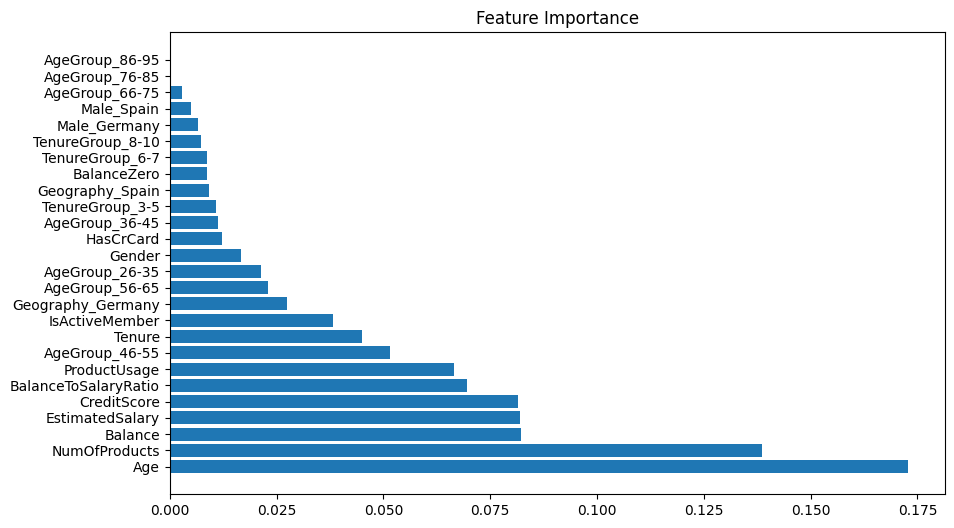

In [20]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names =[features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()